In [21]:
"""
시계열 데이터 시각화 
 1. 날짜형식 수정(다국어 -> 한국어)
 2. 시계열 시각화 
 3. 이동평균 기능 
"""
import pandas as pd
from datetime import datetime # 날짜형식 수정 

cospi = pd.read_csv("./data/cospi.csv")
print(cospi.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    247 non-null    object
 1   Open    247 non-null    int64 
 2   High    247 non-null    int64 
 3   Low     247 non-null    int64 
 4   Close   247 non-null    int64 
 5   Volume  247 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 11.7+ KB
None


In [22]:
cospi.head()

,Date,Open,High,Low,Close,Volume
0,26-Feb-16,1180000,1187000,1172000,1172000,176906
1,25-Feb-16,1172000,1187000,1172000,1179000,128321
2,24-Feb-16,1178000,1179000,1161000,1172000,140407
3,23-Feb-16,1179000,1189000,1173000,1181000,147578
4,22-Feb-16,1190000,1192000,1166000,1175000,174075


In [23]:
# 1. 날짜형식 수정(다국어 -> 한국식)
Date = cospi['Date'] # cospi.Date
Date

0      26-Feb-16
1      25-Feb-16
2      24-Feb-16
3      23-Feb-16
4      22-Feb-16
         ...    
242    06-Mar-15
243    05-Mar-15
244    04-Mar-15
245    03-Mar-15
246    02-Mar-15
Name: Date, Length: 247, dtype: object

In [24]:
kDate = [] # 빈list

for d in Date :
    kDate.append(datetime.strptime(d, "%d-%b-%y"))
    
print(kDate[:10])
print()
cospi['Date'] = kDate # (다국어 -> 한국식)
print(cospi.head())

[datetime.datetime(2016, 2, 26, 0, 0), datetime.datetime(2016, 2, 25, 0, 0), datetime.datetime(2016, 2, 24, 0, 0), datetime.datetime(2016, 2, 23, 0, 0), datetime.datetime(2016, 2, 22, 0, 0), datetime.datetime(2016, 2, 19, 0, 0), datetime.datetime(2016, 2, 18, 0, 0), datetime.datetime(2016, 2, 17, 0, 0), datetime.datetime(2016, 2, 16, 0, 0), datetime.datetime(2016, 2, 15, 0, 0)]

        Date     Open     High      Low    Close  Volume
0 2016-02-26  1180000  1187000  1172000  1172000  176906
1 2016-02-25  1172000  1187000  1172000  1179000  128321
2 2016-02-24  1178000  1179000  1161000  1172000  140407
3 2016-02-23  1179000  1189000  1173000  1181000  147578
4 2016-02-22  1190000  1192000  1166000  1175000  174075


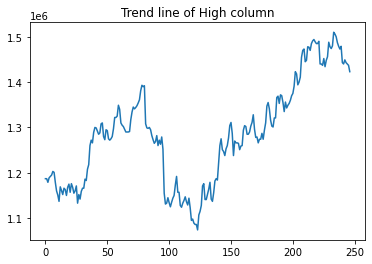

In [25]:
# 2. 시계열 시각화
import matplotlib.pyplot as plt

# 1개 칼럼 추세그래프 
cospi['High'].plot(title = "Trend line of High column")
plt.show()

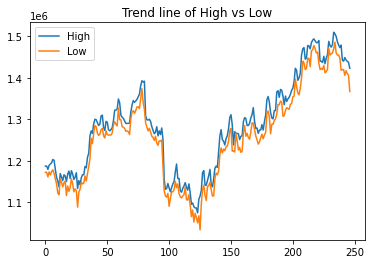

In [26]:
# 2개 칼럼 추세그래프 
cospi[['High', 'Low']].plot(title = "Trend line of High vs Low")
plt.show()

In [27]:
# 2. index 수정 
print(cospi.index)

RangeIndex(start=0, stop=247, step=1)


In [28]:
# index 수정 -> Date 칼럼 
new_cospi = cospi.set_index('Date')
new_cospi.head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075


In [41]:
# 년도별 검색 
new_cospi.loc['2016'].head()


,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075


In [42]:
new_cospi.loc['2015'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-12-30,1260000,1272000,1254000,1260000,203349
2015-12-29,1265000,1266000,1241000,1254000,231802
2015-12-28,1285000,1289000,1266000,1266000,225997
2015-12-24,1295000,1300000,1285000,1285000,151322
2015-12-23,1292000,1299000,1282000,1295000,162043


In [43]:
# 월별 검색 
new_cospi.loc['2016-02'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075


In [45]:
# 범위 검색 
new_cospi.loc['2016-02':'2016-01'].head()

,Open,High,Low,Close,Volume
Date,,,,,
2016-02-26,1180000,1187000,1172000,1172000,176906
2016-02-25,1172000,1187000,1172000,1179000,128321
2016-02-24,1178000,1179000,1161000,1172000,140407
2016-02-23,1179000,1189000,1173000,1181000,147578
2016-02-22,1190000,1192000,1166000,1175000,174075


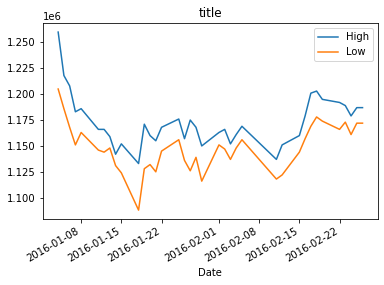

In [47]:
new_cospi_HL = new_cospi[['High', 'Low']]
new_cospi_HL.loc['2016'].plot(title="title")
plt.show()

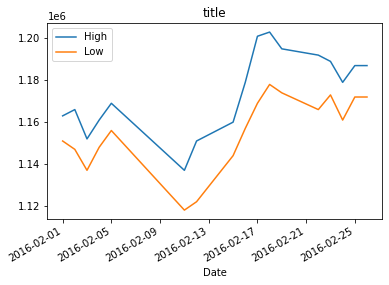

In [48]:
new_cospi_HL.loc['2016-02'].plot(title="title")
plt.show()

In [50]:
# 3. 이동평균 기능 

# 5일, 10일, 20일 
roll_mean5 = pd.Series.rolling(new_cospi.High,
                  window=5, center=False).mean()
roll_mean5

Date
2016-02-26          NaN
2016-02-25          NaN
2016-02-24          NaN
2016-02-23          NaN
2016-02-22    1186800.0
                ...    
2015-03-06    1456800.0
2015-03-05    1450800.0
2015-03-04    1443000.0
2015-03-03    1441800.0
2015-03-02    1438400.0
Name: High, Length: 247, dtype: float64

In [53]:
roll_mean10 = pd.Series.rolling(new_cospi.High,window=10, center=False).mean()
roll_mean10

Date
2016-02-26          NaN
2016-02-25          NaN
2016-02-24          NaN
2016-02-23          NaN
2016-02-22          NaN
                ...    
2015-03-06    1476600.0
2015-03-05    1469900.0
2015-03-04    1463300.0
2015-03-03    1457000.0
2015-03-02    1450600.0
Name: High, Length: 247, dtype: float64

In [54]:
roll_mean20 = pd.Series.rolling(new_cospi.High,window=20, center=False).mean()
roll_mean20

Date
2016-02-26          NaN
2016-02-25          NaN
2016-02-24          NaN
2016-02-23          NaN
2016-02-22          NaN
                ...    
2015-03-06    1467650.0
2015-03-05    1467800.0
2015-03-04    1467950.0
2015-03-03    1467200.0
2015-03-02    1466650.0
Name: High, Length: 247, dtype: float64

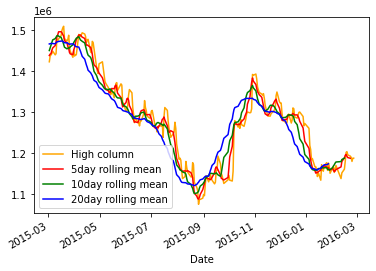

In [55]:
# roll mean 시각화 
new_cospi.High.plot(color='orange', label='High column')
roll_mean5.plot(color='red', label='5day rolling mean')
roll_mean10.plot(color='green', label='10day rolling mean')
roll_mean20.plot(color='blue', label='20day rolling mean')
plt.legend(loc='best')
plt.show()